In [1]:
%matplotlib ipympl

In [2]:
from matplotlib.pyplot import figure, subplots, subplot_mosaic, get_cmap, close
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
from numpy import *
from numpy.linalg import *
from numpy.random import *
from numpy.fft import *

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [4]:
from scipy.io import savemat, loadmat, whosmat

In [5]:
from pandas import read_excel, read_csv, concat as pdconcat

In [6]:
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame, read_file
from geodatasets import get_path, data

In [7]:
myvars = locals()

In [8]:
year_hours = arange(8760) + 1

In [9]:
mu = 0.85
P2E_ratio = 0.25

# Figure: Excess load demand - hour vs. day plot

In [10]:
def return_hours_of_day(day_idxs):

    hrs = zeros((24, len(day_idxs)), dtype=int)

    for i in range(len(day_idxs)):

        n = day_idxs[i]

        hrs_low = 24*(n-1) + 1
        hrs_high = 24*n
        
        hrs[:,i] = arange(hrs_low, hrs_high+1)-1
    
    return hrs

In [12]:
base_df = read_excel("./Sample data for battery use optimization r3.xlsx", sheet_name=f"{'Median'} temp")
grid_co2_t = base_df["Grid_CO2_hrs (kg)"].to_numpy()/907.185 # express in tons
grid_demand_MW = base_df["Grid_Energy_hrs (kWh)"].to_numpy()/1e3 # express in tons

In [13]:
days_of_year = arange(1, 366)
sat_days = days_of_year[5::7];
sun_days = days_of_year[6::7];

sat_hrs_idxs = return_hours_of_day(sat_days);
sun_hrs_idxs = return_hours_of_day(sun_days);

grid_demand_MW[sat_hrs_idxs.flatten()] = 0.0;
grid_demand_MW[sun_hrs_idxs.flatten()] = 0.0;
grid_co2_t[sat_hrs_idxs.flatten()] = 0.0;
grid_co2_t[sun_hrs_idxs.flatten()] = 0.0;

In [14]:
hr_mat_base = base_df["Time (hrs)"].to_numpy().reshape((365, 24))
grid_demand_mat = grid_demand_MW.reshape((365, 24)).T
grid_co2_mat = grid_co2_t.reshape((365, 24)).T
hr_mat, day_mat = meshgrid(arange(1, 25), arange(1, 366), indexing="ij")

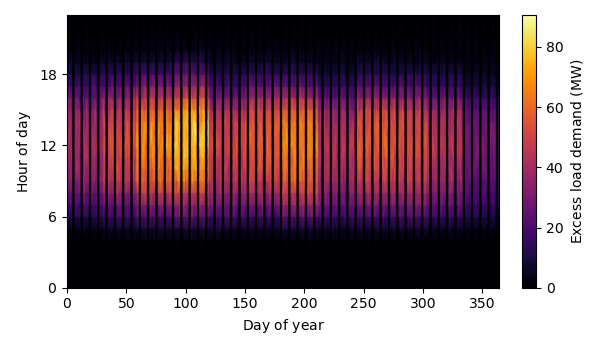

In [17]:
fig, ax = subplots(figsize=(6, 3.5))

pcolor = ax.pcolormesh(day_mat-1, hr_mat-1, grid_demand_mat, shading="gouraud", cmap="inferno")

ax.set_ylim((1, 23))
ax.set_yticks(array([0, 6, 12, 18]), labels=[r"$0$", r"$6$", r"$12$", r"$18$"])
ax.set_ylabel(r"$\mathrm{Hour\ of\ day}$")

ax.set_xlim((0, 364))
ax.set_xlabel(r"$\mathrm{Day\ of\ year}$")

cbar = fig.colorbar(pcolor, ax=ax, label=r"$\mathrm{Excess\ load\ demand\ (MW)}$", fraction=0.03)

fig.tight_layout()

fig.savefig("FigS1.pdf")

# Figure: Excess CO2 emissions

/var/folders/1j/845hv86j0d314znfz61fnlzm0000gn/T/ipykernel_45878/263309766.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


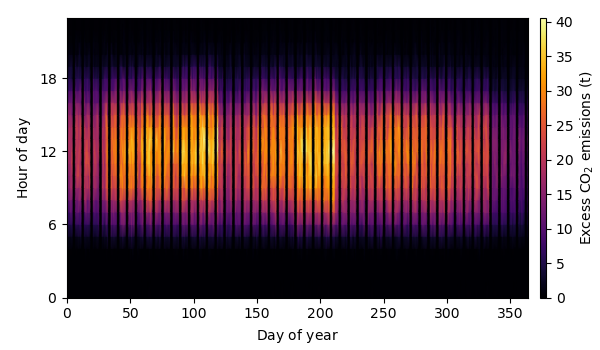

In [20]:
fig, ax = subplots(figsize=(6, 3.5))

pcolor = ax.pcolormesh(day_mat-1, hr_mat-1, grid_co2_mat, shading="gouraud", cmap="inferno")

ax.set_ylim((1, 23))
ax.set_yticks(array([0, 6, 12, 18]), labels=[r"$0$", r"$6$", r"$12$", r"$18$"])
ax.set_ylabel(r"$\mathrm{Hour\ of\ day}$")

ax.set_xlim((0, 364))
ax.set_xlabel(r"$\mathrm{Day\ of\ year}$")

cax = fig.add_axes([0.9, 0.15, 0.01, 0.95-0.15])
cbar = fig.colorbar(pcolor, cax=cax, label=r"$\mathrm{Excess}\ \mathrm{CO}_{2}\ \mathrm{emissions}\ (\mathrm{t})$")

fig.tight_layout()

fig.subplots_adjust(bottom=0.15, top=0.95, right=0.88)


fig.savefig("FigS2.pdf")

# Figure: Joint demand and CO2 emissions

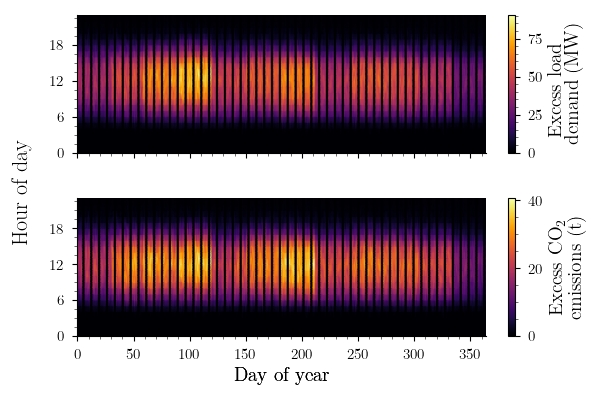

In [45]:
fig, (ax, ax2) = subplots(2, 1, figsize=(6, 4), sharex=True)

pcolor = ax.pcolormesh(day_mat-1, hr_mat-1, grid_demand_mat, shading="gouraud", cmap="inferno")

ax.set_ylim((1, 23))
ax.set_yticks(array([0, 6, 12, 18]), labels=[r"$0$", r"$6$", r"$12$", r"$18$"])
# ax.set_ylabel(r"$\textrm{Hour of day}$")

ax.set_xlim((0, 364))
ax.set_xlabel(r"$\textrm{Day of year}$")

cbar = fig.colorbar(pcolor, ax=ax, label=r"$\textrm{Excess load}$" + r"\newline" + r"$\hspace*{10pt}\textrm{demand (MW)}$", fraction=0.03)

pcolor2 = ax2.pcolormesh(day_mat-1, hr_mat-1, grid_co2_mat, shading="gouraud", cmap="inferno")

ax2.set_ylim((1, 23))
ax2.set_yticks(array([0, 6, 12, 18]), labels=[r"$0$", r"$6$", r"$12$", r"$18$"])
# ax2.set_ylabel(r"$\textrm{Hour of day}$")

ax2.set_xlim((0, 364))
ax2.set_xlabel(r"$\textrm{Day of year}$")

cbar2 = fig.colorbar(pcolor2, ax=ax2, label=r"$\textrm{Excess}\ \mathrm{CO}_{2}$" + r"\newline" + r"$\hspace*{12pt}\textrm{emissions}\ (\mathrm{t})$", fraction=0.03)

fig.supylabel(r"$\textrm{Hour of day}$", fontsize=16, y=0.52)

fig.tight_layout()
fig.align_labels()

fig.savefig("excess_load_demand_and_CO2_figure.pdf")

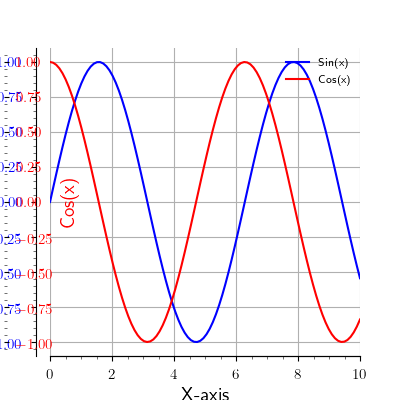

In [46]:
x